c:\Users\maxip\AppData\Local\Programs\Python\Python313\Lib\site-packages\ramachandraw\utils.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


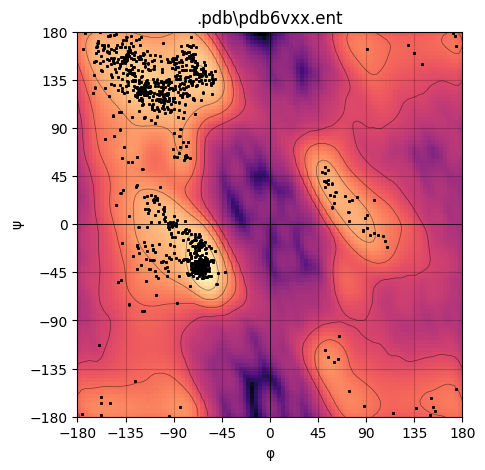

In [ ]:
#az első cella a külső a ramachandraw extensionnel működik, de ezt nem használuk csak itt van mentésként

from ramachandraw.parser import get_phi_psi
from ramachandraw.utils import fetch_pdb, plot

# PDB id
pdb_id = "6vxx"

# Draw the Ramachandran plot
plot(fetch_pdb(pdb_id), save=False, show=True, alpha=1, cmap="magma", dpi=100)


# Generate a dictionary to store the (phi, psi) torsion angles
torsion_angles = get_phi_psi(fetch_pdb(pdb_id))


In [ ]:
#ez a torziós szög és phi&psi kalkuátor

# === Function to calculate dihedral (torsion) angle ===
def calculate_dihedral(p1, p2, p3, p4):
    """
    Calculate the dihedral angle (in degrees) between four 3D points.

    Parameters:
        p1, p2, p3, p4: np.ndarray
            3D coordinates of four consecutive atoms.

    Returns:
        float: Dihedral angle in degrees.
    """
    b0 = -1.0 * (p2 - p1)
    b1 = p3 - p2
    b2 = p4 - p3

    b1 /= np.linalg.norm(b1)
    v = b0 - np.dot(b0, b1) * b1
    w = b2 - np.dot(b2, b1) * b1

    x = np.dot(v, w)
    y = np.dot(np.cross(b1, v), w)
    return np.degrees(np.arctan2(y, x))

# === Function to extract phi/psi angles from your DataFrame ===
def extract_phi_psi(df):
    """
    Extract phi and psi angles from a DataFrame of atomic coordinates.

    Parameters:
        df: pandas.DataFrame
            Must contain columns: ['atom_type', 'amino_index', 'x', 'y', 'z'].

    Returns:
        np.ndarray: Array of (phi, psi) tuples.
    """
    df = df[df['atom_type'].isin(['N', 'CA', 'C'])].copy()
    df = df.sort_values(by=['amino_index', 'atom_type'])

    # Build residue-wise coordinate dictionary
    residues = {}
    for res_id, group in df.groupby('amino_index'):
        atom_coords = {row['atom_type']: np.array([row['x'], row['y'], row['z']])
                       for _, row in group.iterrows()}
        if {'N', 'CA', 'C'}.issubset(atom_coords):
            residues[res_id] = atom_coords

    # Compute φ/ψ angles
    sorted_keys = sorted(residues.keys())
    angles = []

    for i in range(1, len(sorted_keys) - 1):
        prev_res = residues[sorted_keys[i - 1]]
        this_res = residues[sorted_keys[i]]
        next_res = residues[sorted_keys[i + 1]]

        try:
            phi = calculate_dihedral(prev_res['C'], this_res['N'], this_res['CA'], this_res['C'])
            psi = calculate_dihedral(this_res['N'], this_res['CA'], this_res['C'], next_res['N'])
            angles.append((phi, psi))
        except:
            continue

    return np.array(angles)

# === Function to plot the Ramachandran plot ===
def plot_ramachandran(angles):
    """
    Generate a Ramachandran plot from a list of (phi, psi) angles.

    Parameters:
        angles: np.ndarray
            Array of shape (n, 2), where each row is (phi, psi).
    """
    if len(angles) == 0:
        print("No valid φ/ψ angles to plot.")
        return

    phi, psi = angles[:, 0], angles[:, 1]
    plt.figure(figsize=(8, 8))
    plt.scatter(phi, psi, s=5, alpha=0.7)
    plt.xlabel('Phi (φ)', fontsize=12)
    plt.ylabel('Psi (ψ)', fontsize=12)
    plt.title('Ramachandran Plot', fontsize=14)
    plt.xlim(-180, 180)
    plt.ylim(-180, 180)
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# === Usage example ===
# df = pd.read_csv("your_dataframe.csv")  # Or however you're loading it
# angles = extract_phi_psi(df)
# plot_ramachandran(angles)
print("Hell yeah!")
#-------------------------

ModuleNotFoundError: No module named 'example'